# Jun 12th, 2022 (full brain bold: KABA 128)

**Motivation**: K = 10 looks specially beautiful <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from model.configuration import Config
from model.mouse import Mice
from analysis.network import *
from analysis.group import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Prepare

In [2]:
mice = Mice(128, load_parcel=True, load_allen=True)

task = 'rest'
mice.setup_func_data(task)

num_k, p = None, 20
perc = f'p{p}-sample'
props_base = {
    'kw_kmeans': {'n_init': 2},
    'perc': perc,
    'num_k': num_k,
    'mice': mice,
    'task': task,
    'metric': 'pearson',
    'match_using': 'gam',
    'match_metric': 'euclidean',
    'graph_type': 'real',
    'verbose': True,
}
props_bo = {'mode': 'bold', **props_base}

### K = 8

In [3]:
props_bo['num_k'] = 8
gr_bo = Group(**props_bo).fit_group()

In [4]:
deg = avg(gr_bo.run_deg, 1)

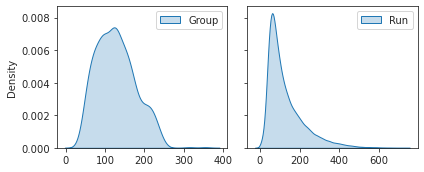

In [5]:
fig, axes = create_figure(1, 2, (6, 2.5), sharey='all')
sns.kdeplot(
    deg[np.isfinite(deg)],
    fill=True,
    label='Group',
    ax=axes[0],
)
sns.kdeplot(
    gr_bo.run_deg[np.isfinite(gr_bo.run_deg)],
    fill=True,
    label='Run',
    ax=axes[1],
)
for ax in axes.flat:
    ax.legend(loc='upper right')
plt.show()

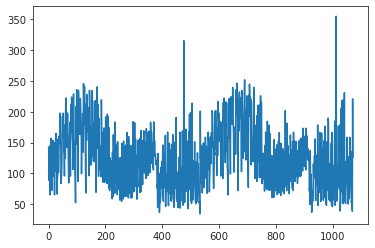

In [6]:
plt.plot(deg);

In [7]:
gr_bo.pi_symmetry_score(deg.reshape(1, -1))[0]

{1: 0.967, -1: 0.967}

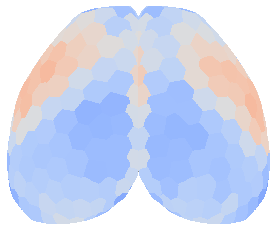

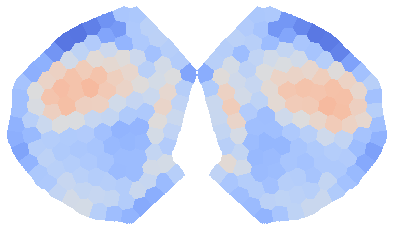

In [8]:
layer = 0
_ = gr_bo.show(
    data=deg,
    vmin=np.nanmin(deg),
    vmax=np.nanmax(deg),
    mask_thresh=0.001,
    figsize=(5, 4),
    cmap='coolwarm',
    add_disjoint=False,
    layer=layer,
)
_ = gr_bo.show(
    data=deg,
    vmin=np.nanmin(deg),
    vmax=np.nanmax(deg),
    mask_thresh=0.001,
    figsize=(7, 4),
    cmap='coolwarm',
    proj='flat',
    add_disjoint=False,
    layer=layer,
)

In [9]:
deg_sfc = gr_bo.get_surface_pi(deg.reshape(1, -1)).squeeze()

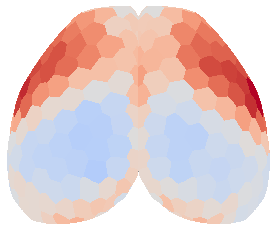

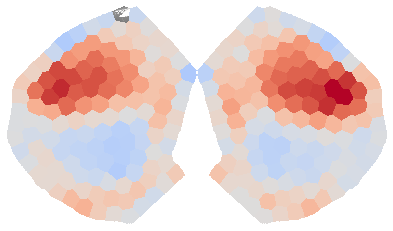

In [10]:
layer = 0
_ = gr_bo.show(
    data=deg_sfc,
    vmin=np.nanmin(deg_sfc),
    vmax=np.nanmax(deg_sfc),
    mask_thresh=0.001,
    figsize=(5, 4),
    cmap='coolwarm',
    add_disjoint=False,
    layer=layer,
)
_ = gr_bo.show(
    data=deg_sfc,
    vmin=np.nanmin(deg_sfc),
    vmax=np.nanmax(deg_sfc),
    mask_thresh=0.001,
    figsize=(7, 4),
    cmap='coolwarm',
    proj='flat',
    add_disjoint=False,
    layer=layer,
)

In [11]:
deg_vol = np_nans(mice.parcel['cortex'].shape)
for nn, lbl in gr_bo.n2l.items():
    i = mice.parcel.encode(lbl)
    hcl = [int(e) for e in lbl.split('-')]
    if len(hcl) == 3:
        deg_vol[mice.parcel['cortex'] == i] = deg[nn]
    else:
        obj_name = f"subcortex-{'l' if hcl[0] == 1 else 'r'}"
        deg_vol[mice.parcel[obj_name] == i] = deg[nn]
deg_vol.shape

(132, 80, 114)

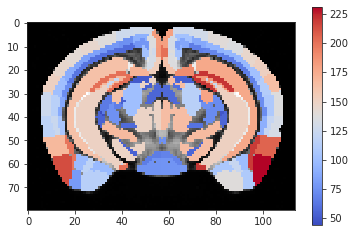

In [12]:
slice_i = 80
plt.imshow(mice.al.template[slice_i], cmap='Greys_r')
plt.imshow(deg_vol[slice_i], cmap='coolwarm')
plt.colorbar()
plt.show()

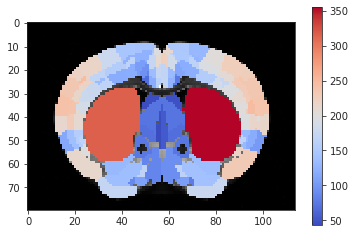

In [13]:
slice_i = 50
plt.imshow(mice.al.template[slice_i], cmap='Greys_r')
plt.imshow(deg_vol[slice_i], cmap='coolwarm')
plt.colorbar()
plt.show()

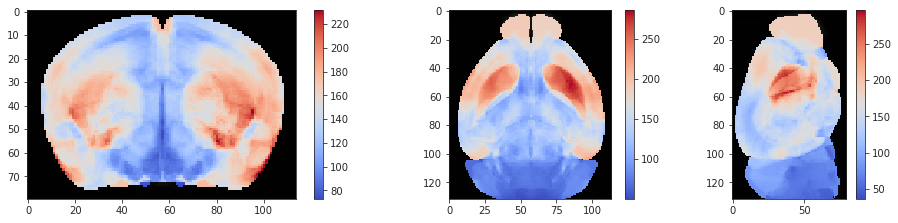

In [25]:
fig, axes = create_figure(1, 3, (13, 3.2), width_ratios=[1.9, 1.4, 1])

for i, ax in enumerate(axes):
    ax.imshow(mice.al.template.mean(i), cmap='Greys_r')
    im = ax.imshow(bn.nanmean(deg_vol, i), cmap='coolwarm')
    plt.colorbar(im, ax=ax)
plt.show()

#### pi

In [26]:
gr_bo.avg()
gr_bo.pi.shape

(8, 1072)

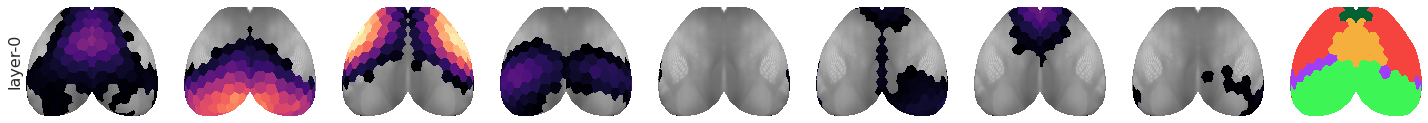

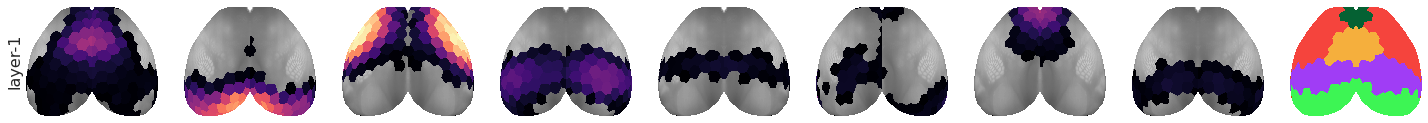

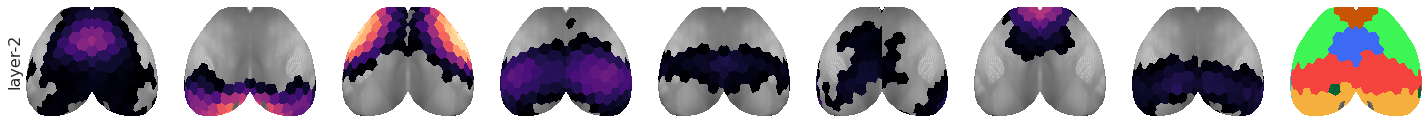

In [27]:
for i in range(3):
    _ = gr_bo.show(
        data={f'layer-{i}': gr_bo.pi},
        layer=i,
        vmin=0.1,
        vmax=np.nanmax(gr_bo.pi),
        figsize=(25, 5),
        ylabel_fontsize=16,
    )

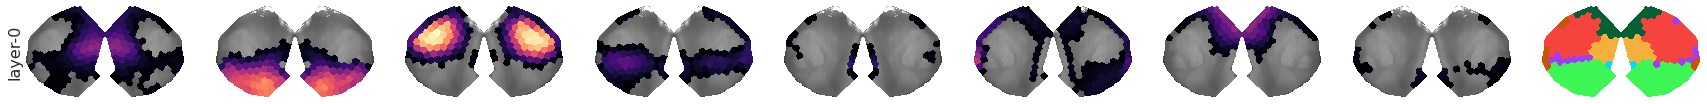

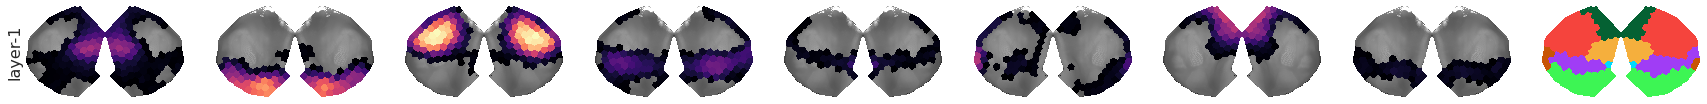

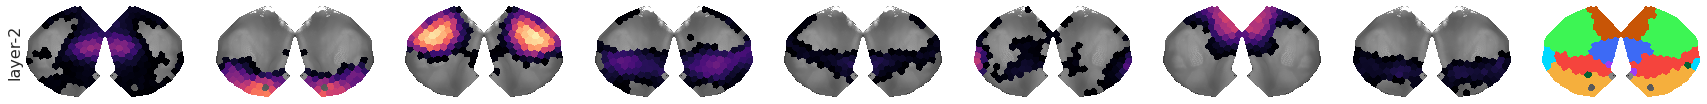

In [28]:
for i in range(3):
    _ = gr_bo.show(
        data={f'layer-{i}': gr_bo.pi},
        layer=i,
        vmin=0.1,
        vmax=np.nanmax(gr_bo.pi),
        proj='flat',
        figsize=(30, 4),
        ylabel_fontsize=16,
    )

In [29]:
x = gr_bo.get_surface_pi()
x.shape

(8, 1072)

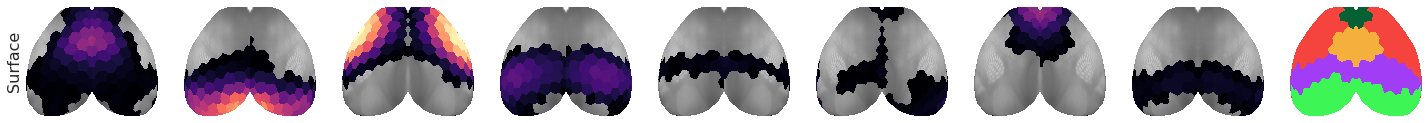

In [30]:
_ = gr_bo.show(
    data={'Surface': x},
    layer=0,
    vmin=0.1,
    vmax=np.nanmax(x),
    figsize=(25, 5),
    ylabel_fontsize=16,
)

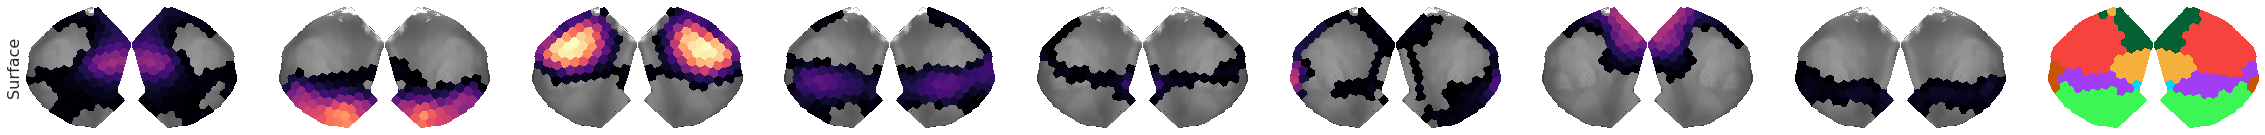

In [31]:
_ = gr_bo.show(
    data={'Surface': x},
    layer=0,
    vmin=0.1,
    vmax=np.nanmax(x),
    proj='flat',
    figsize=(40, 5),
    ylabel_fontsize=16,
)

In [32]:
pi_vol = np_nans((gr_bo.num_k,) + mice.al.dims)
for nn, lbl in gr_bo.n2l.items():
    i = mice.parcel.encode(lbl)
    hcl = [int(e) for e in lbl.split('-')]
    if len(hcl) == 3:
        pi_vol[:, mice.parcel['cortex'] == i] = gr_bo.pi[:, [nn]]
    else:
        obj_name = f"subcortex-{'l' if hcl[0] == 1 else 'r'}"
        pi_vol[:, mice.parcel[obj_name] == i] = gr_bo.pi[:, [nn]]
pi_vol.shape

(8, 132, 80, 114)

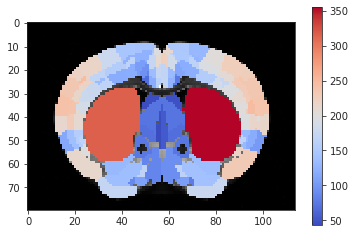

In [33]:
slice_i = 50
plt.imshow(mice.al.template[slice_i], cmap='Greys_r')
plt.imshow(deg_vol[slice_i], cmap='coolwarm')
plt.colorbar()
plt.show()

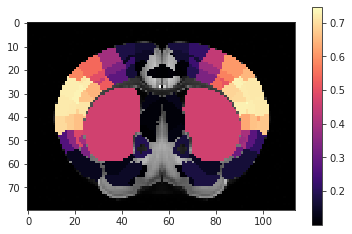

In [34]:
oc = 2
slice_i = 50
plt.imshow(mice.al.template[slice_i], cmap='Greys_r')
plt.imshow(mwh(pi_vol[oc, slice_i] < 0.1, pi_vol[oc, slice_i]), cmap='magma')
plt.colorbar()
plt.show()

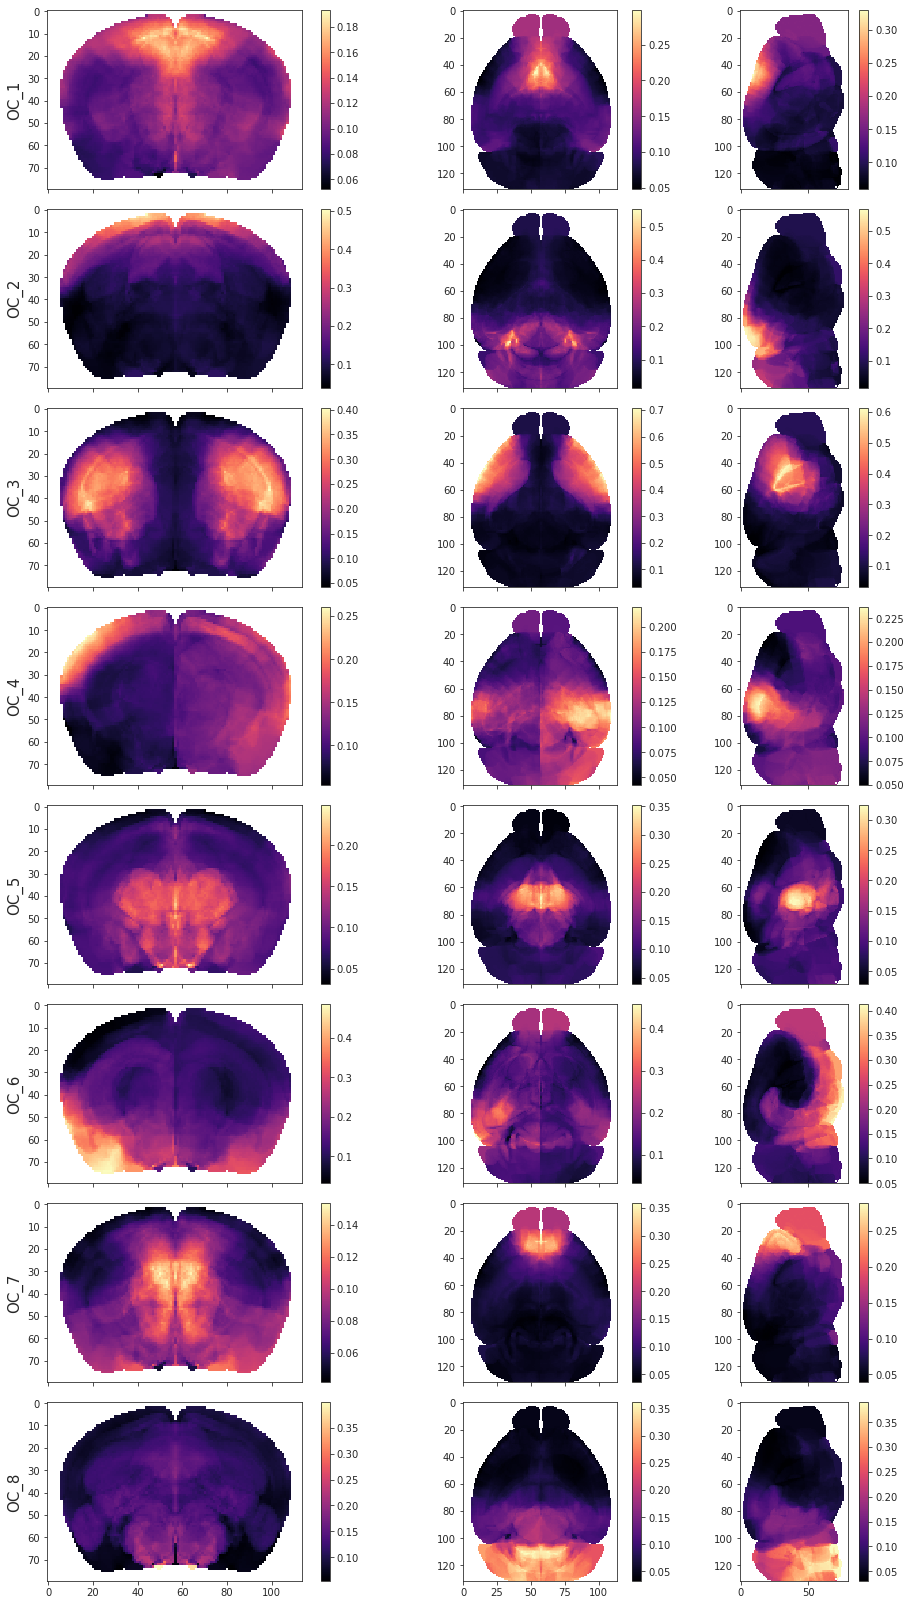

In [45]:
fig, axes = create_figure(gr_bo.num_k, 3, (13, 2.8 * gr_bo.num_k), 'col', 'col', width_ratios=[1.7, 1.4, 1])

for i in range(gr_bo.num_k):
    for j, ax in enumerate(axes[i]):
        im = ax.imshow(bn.nanmean(pi_vol[i], j), cmap='magma')
        plt.colorbar(im, ax=ax)
        if j == 0:
            ax.set_ylabel(f"OC_{i + 1}", fontsize=15)
plt.show()

In [43]:
gr_bo.pi_symmetry_score()

(
    {
        1: 0.984,
        2: 0.986,
        3: 0.986,
        4: 0.758,
        5: 0.991,
        6: 0.849,
        7: 0.993,
        8: 0.978,
        -1: 0.941
    },
    {
        1: 0.994,
        2: 0.983,
        3: 0.974,
        4: 0.935,
        5: 0.991,
        6: 0.951,
        7: 0.989,
        8: 0.985,
        -1: 0.975
    }
)

### K = 10

In [46]:
props_bo['num_k'] = 10
gr_bo = Group(**props_bo).fit_group()

#### pi

In [47]:
gr_bo.avg()
gr_bo.pi.shape

(10, 1072)

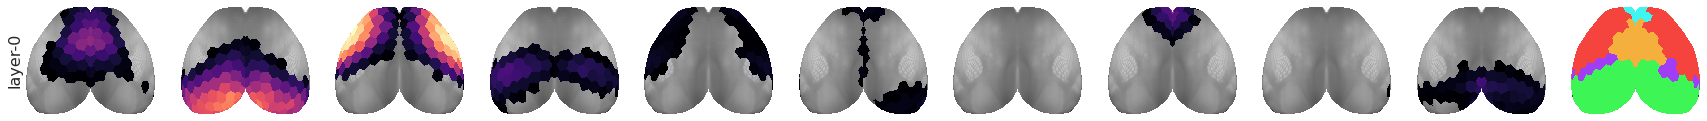

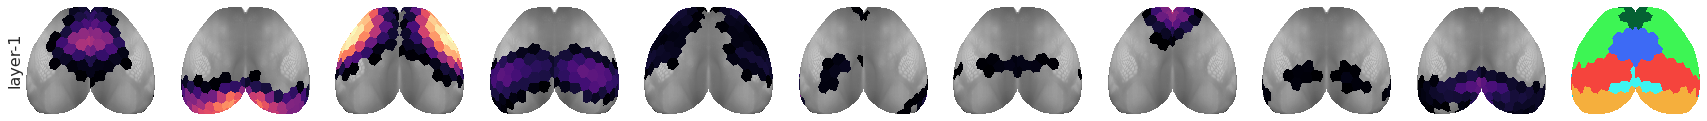

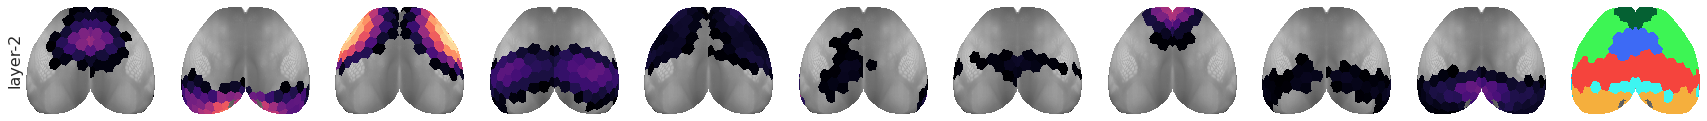

In [48]:
for i in range(3):
    _ = gr_bo.show(
        data={f'layer-{i}': gr_bo.pi},
        layer=i,
        vmin=0.1,
        vmax=np.nanmax(gr_bo.pi),
        figsize=(30, 5),
        ylabel_fontsize=16,
    )

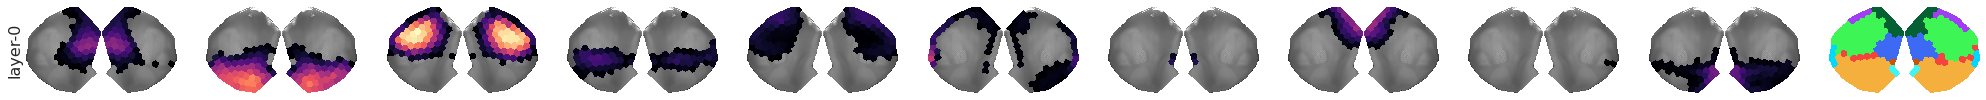

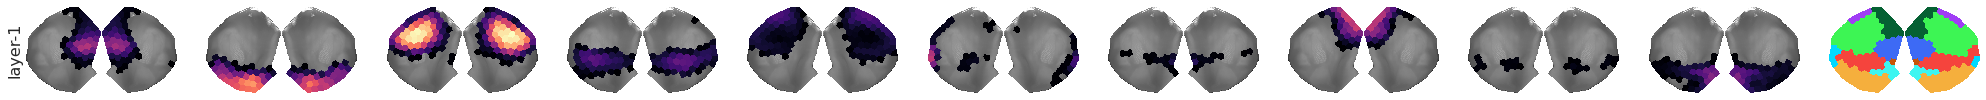

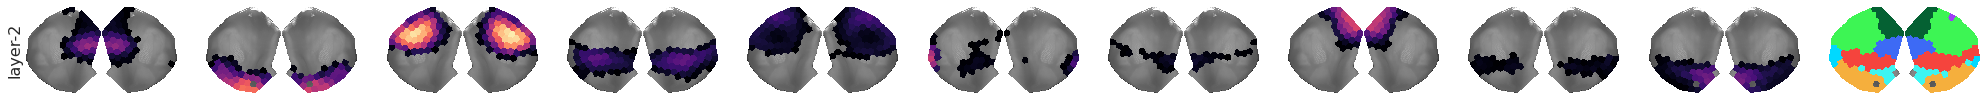

In [49]:
for i in range(3):
    _ = gr_bo.show(
        data={f'layer-{i}': gr_bo.pi},
        layer=i,
        vmin=0.1,
        vmax=np.nanmax(gr_bo.pi),
        proj='flat',
        figsize=(35, 4),
        ylabel_fontsize=16,
    )

In [50]:
x = gr_bo.get_surface_pi()
x.shape

(10, 1072)

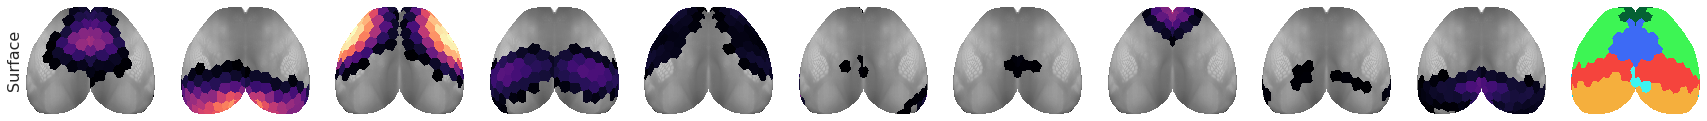

In [51]:
_ = gr_bo.show(
    data={'Surface': x},
    layer=0,
    vmin=0.1,
    vmax=np.nanmax(x),
    figsize=(30, 5),
    ylabel_fontsize=16,
)

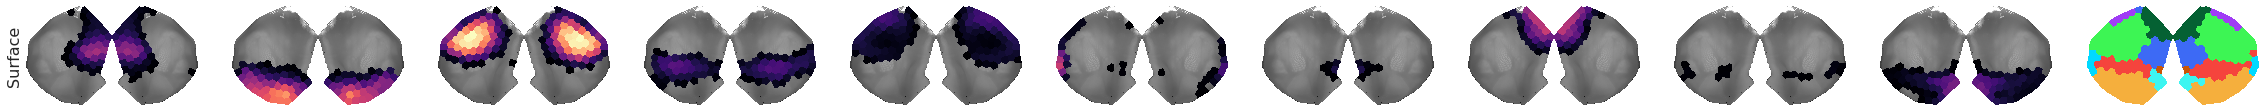

In [52]:
_ = gr_bo.show(
    data={'Surface': x},
    layer=0,
    vmin=0.1,
    vmax=np.nanmax(x),
    proj='flat',
    figsize=(40, 5),
    ylabel_fontsize=16,
)

In [53]:
pi_vol = np_nans((gr_bo.num_k,) + mice.al.dims)
for nn, lbl in gr_bo.n2l.items():
    i = mice.parcel.encode(lbl)
    hcl = [int(e) for e in lbl.split('-')]
    if len(hcl) == 3:
        pi_vol[:, mice.parcel['cortex'] == i] = gr_bo.pi[:, [nn]]
    else:
        obj_name = f"subcortex-{'l' if hcl[0] == 1 else 'r'}"
        pi_vol[:, mice.parcel[obj_name] == i] = gr_bo.pi[:, [nn]]
pi_vol.shape

(10, 132, 80, 114)

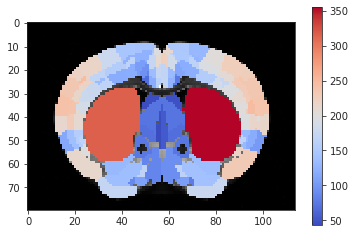

In [54]:
slice_i = 50
plt.imshow(mice.al.template[slice_i], cmap='Greys_r')
plt.imshow(deg_vol[slice_i], cmap='coolwarm')
plt.colorbar()
plt.show()

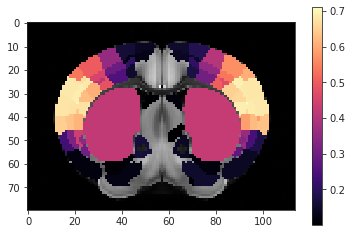

In [55]:
oc = 2
slice_i = 50
plt.imshow(mice.al.template[slice_i], cmap='Greys_r')
plt.imshow(mwh(pi_vol[oc, slice_i] < 0.1, pi_vol[oc, slice_i]), cmap='magma')
plt.colorbar()
plt.show()

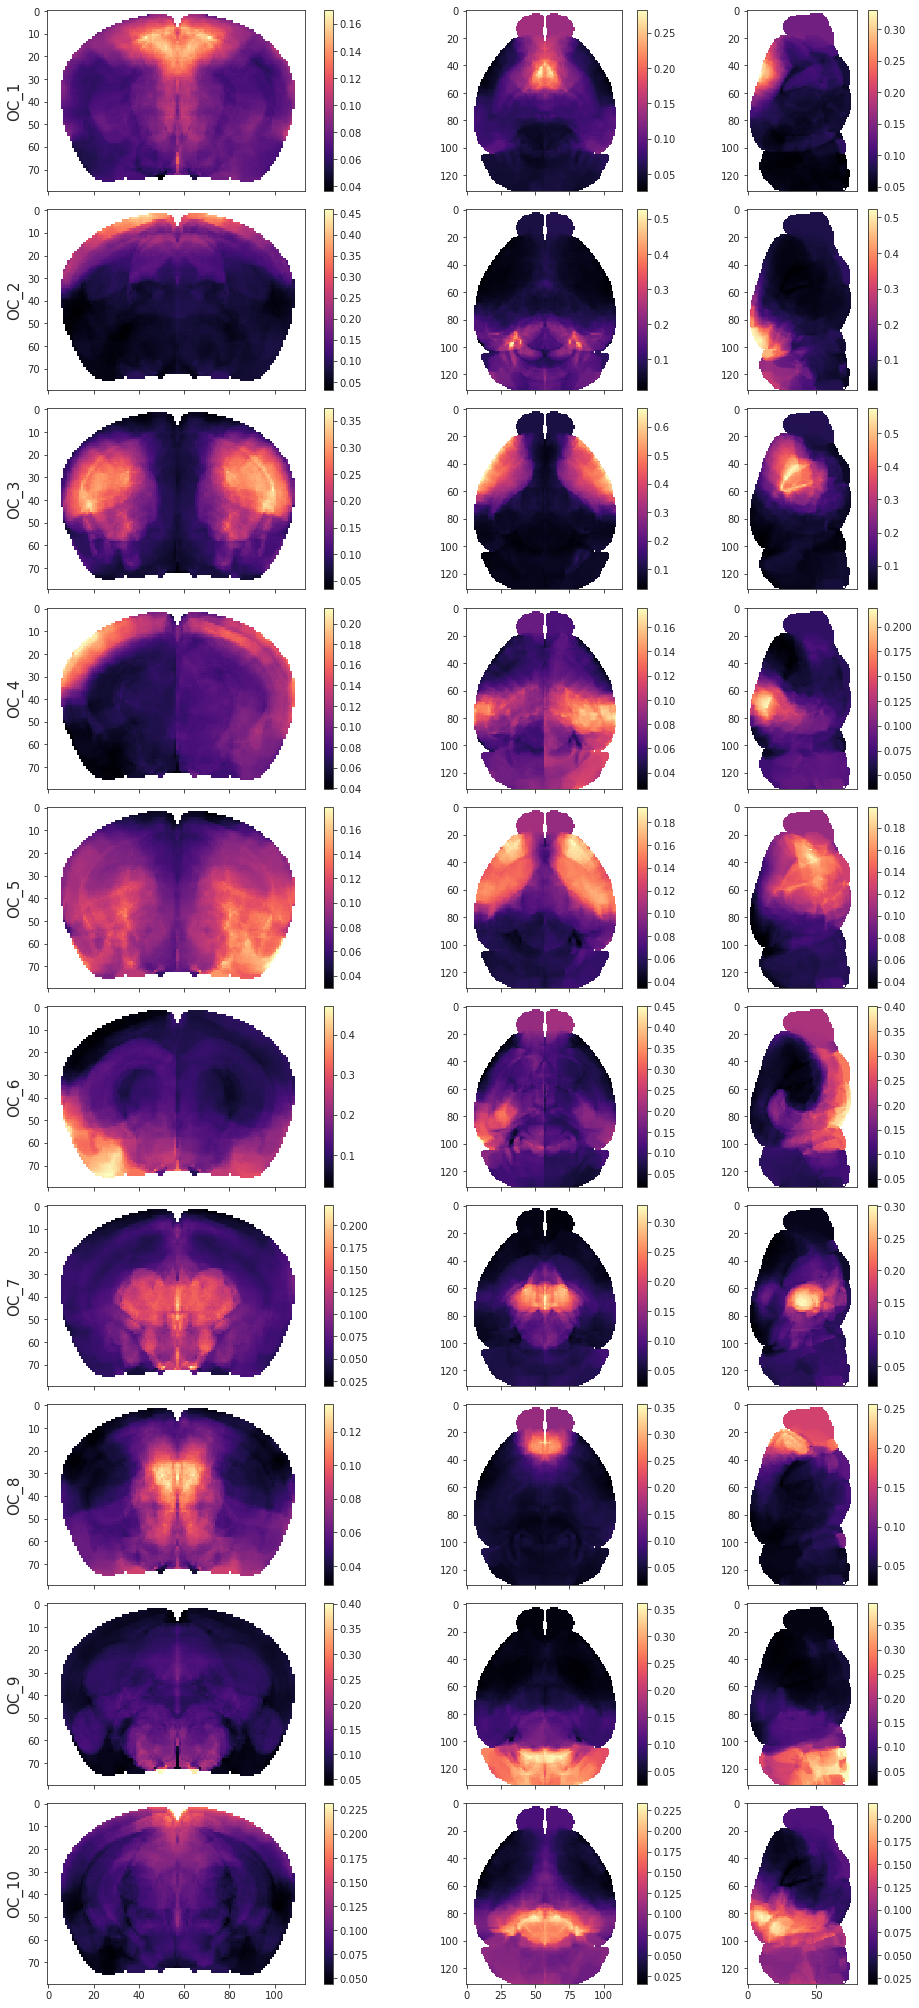

In [56]:
fig, axes = create_figure(gr_bo.num_k, 3, (13, 2.8 * gr_bo.num_k), 'col', 'col', width_ratios=[1.7, 1.4, 1])

for i in range(gr_bo.num_k):
    for j, ax in enumerate(axes[i]):
        im = ax.imshow(bn.nanmean(pi_vol[i], j), cmap='magma')
        plt.colorbar(im, ax=ax)
        if j == 0:
            ax.set_ylabel(f"OC_{i + 1}", fontsize=15)
plt.show()

In [57]:
gr_bo.pi_symmetry_score()

(
    {
        1: 0.988,
        2: 0.983,
        3: 0.985,
        4: 0.858,
        5: 0.96,
        6: 0.868,
        7: 0.993,
        8: 0.994,
        9: 0.988,
        10: 0.969,
        -1: 0.959
    },
    {
        1: 0.996,
        2: 0.983,
        3: 0.972,
        4: 0.95,
        5: 0.987,
        6: 0.965,
        7: 0.996,
        8: 0.994,
        9: 0.993,
        10: 0.985,
        -1: 0.982
    }
)

### K = 12

In [3]:
props_bo['num_k'] = 12
gr_bo = Group(**props_bo).fit_group()

#### pi

In [4]:
gr_bo.avg()
gr_bo.pi.shape

(12, 1072)

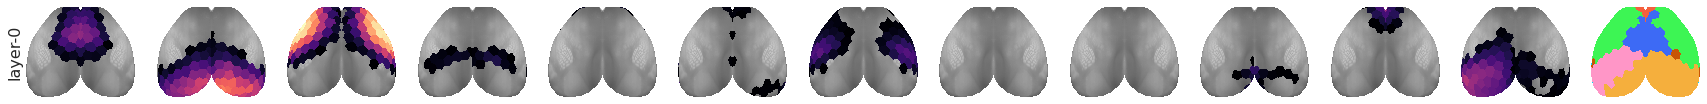

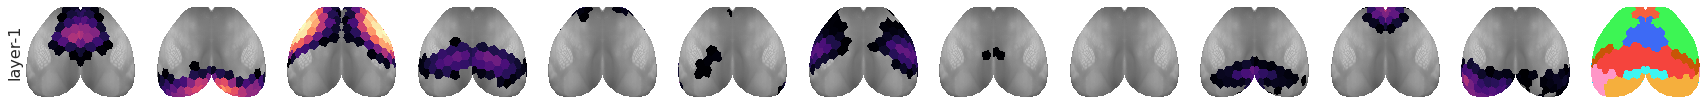

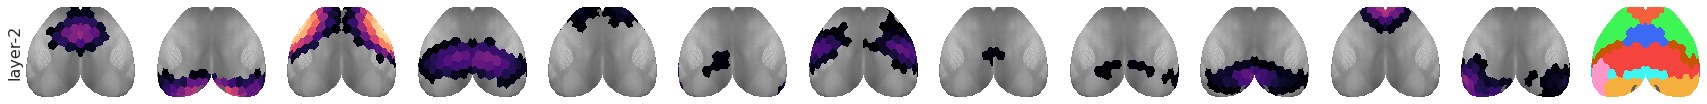

In [5]:
for i in range(3):
    _ = gr_bo.show(
        data={f'layer-{i}': gr_bo.pi},
        layer=i,
        vmin=0.1,
        vmax=np.nanmax(gr_bo.pi),
        figsize=(30, 5),
        ylabel_fontsize=16,
    )

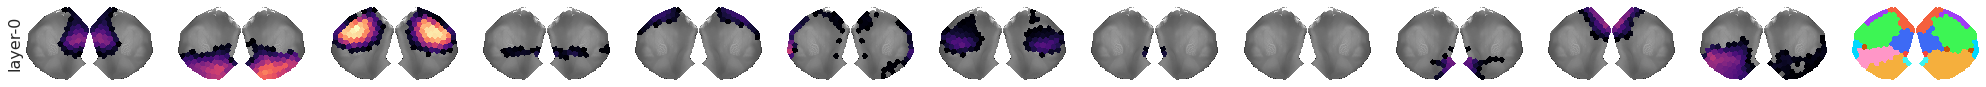

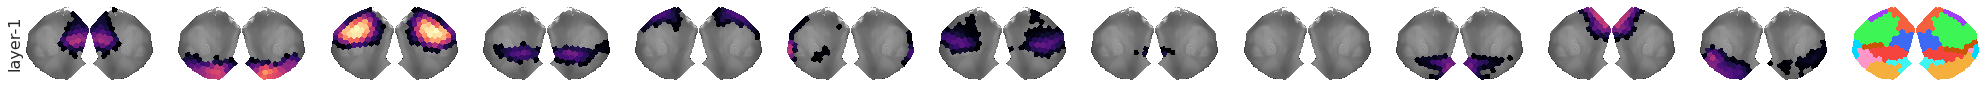

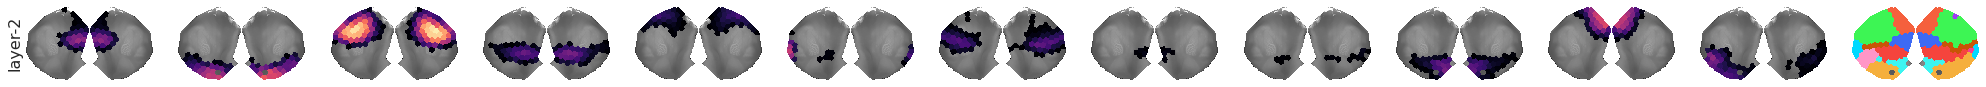

In [6]:
for i in range(3):
    _ = gr_bo.show(
        data={f'layer-{i}': gr_bo.pi},
        layer=i,
        vmin=0.1,
        vmax=np.nanmax(gr_bo.pi),
        proj='flat',
        figsize=(35, 4),
        ylabel_fontsize=16,
    )

In [7]:
x = gr_bo.get_surface_pi()
x.shape

(12, 1072)

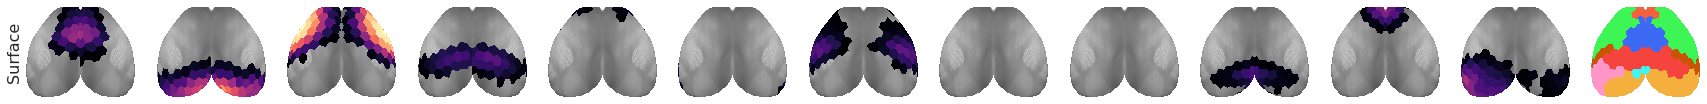

In [8]:
_ = gr_bo.show(
    data={'Surface': x},
    layer=0,
    vmin=0.1,
    vmax=np.nanmax(x),
    figsize=(30, 5),
    ylabel_fontsize=16,
)

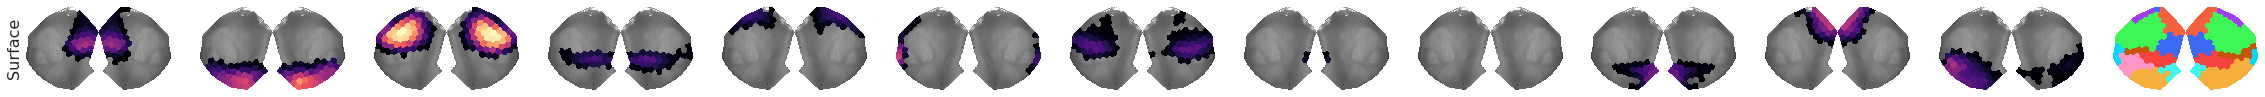

In [9]:
_ = gr_bo.show(
    data={'Surface': x},
    layer=0,
    vmin=0.1,
    vmax=np.nanmax(x),
    proj='flat',
    figsize=(40, 5),
    ylabel_fontsize=16,
)

In [10]:
pi_vol = np_nans((gr_bo.num_k,) + mice.al.dims)
for nn, lbl in gr_bo.n2l.items():
    i = mice.parcel.encode(lbl)
    hcl = [int(e) for e in lbl.split('-')]
    if len(hcl) == 3:
        pi_vol[:, mice.parcel['cortex'] == i] = gr_bo.pi[:, [nn]]
    else:
        obj_name = f"subcortex-{'l' if hcl[0] == 1 else 'r'}"
        pi_vol[:, mice.parcel[obj_name] == i] = gr_bo.pi[:, [nn]]
pi_vol.shape

(12, 132, 80, 114)

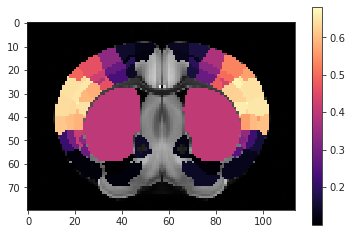

In [11]:
oc = 2
slice_i = 50
plt.imshow(mice.al.template[slice_i], cmap='Greys_r')
plt.imshow(mwh(pi_vol[oc, slice_i] < 0.1, pi_vol[oc, slice_i]), cmap='magma')
plt.colorbar()
plt.show()

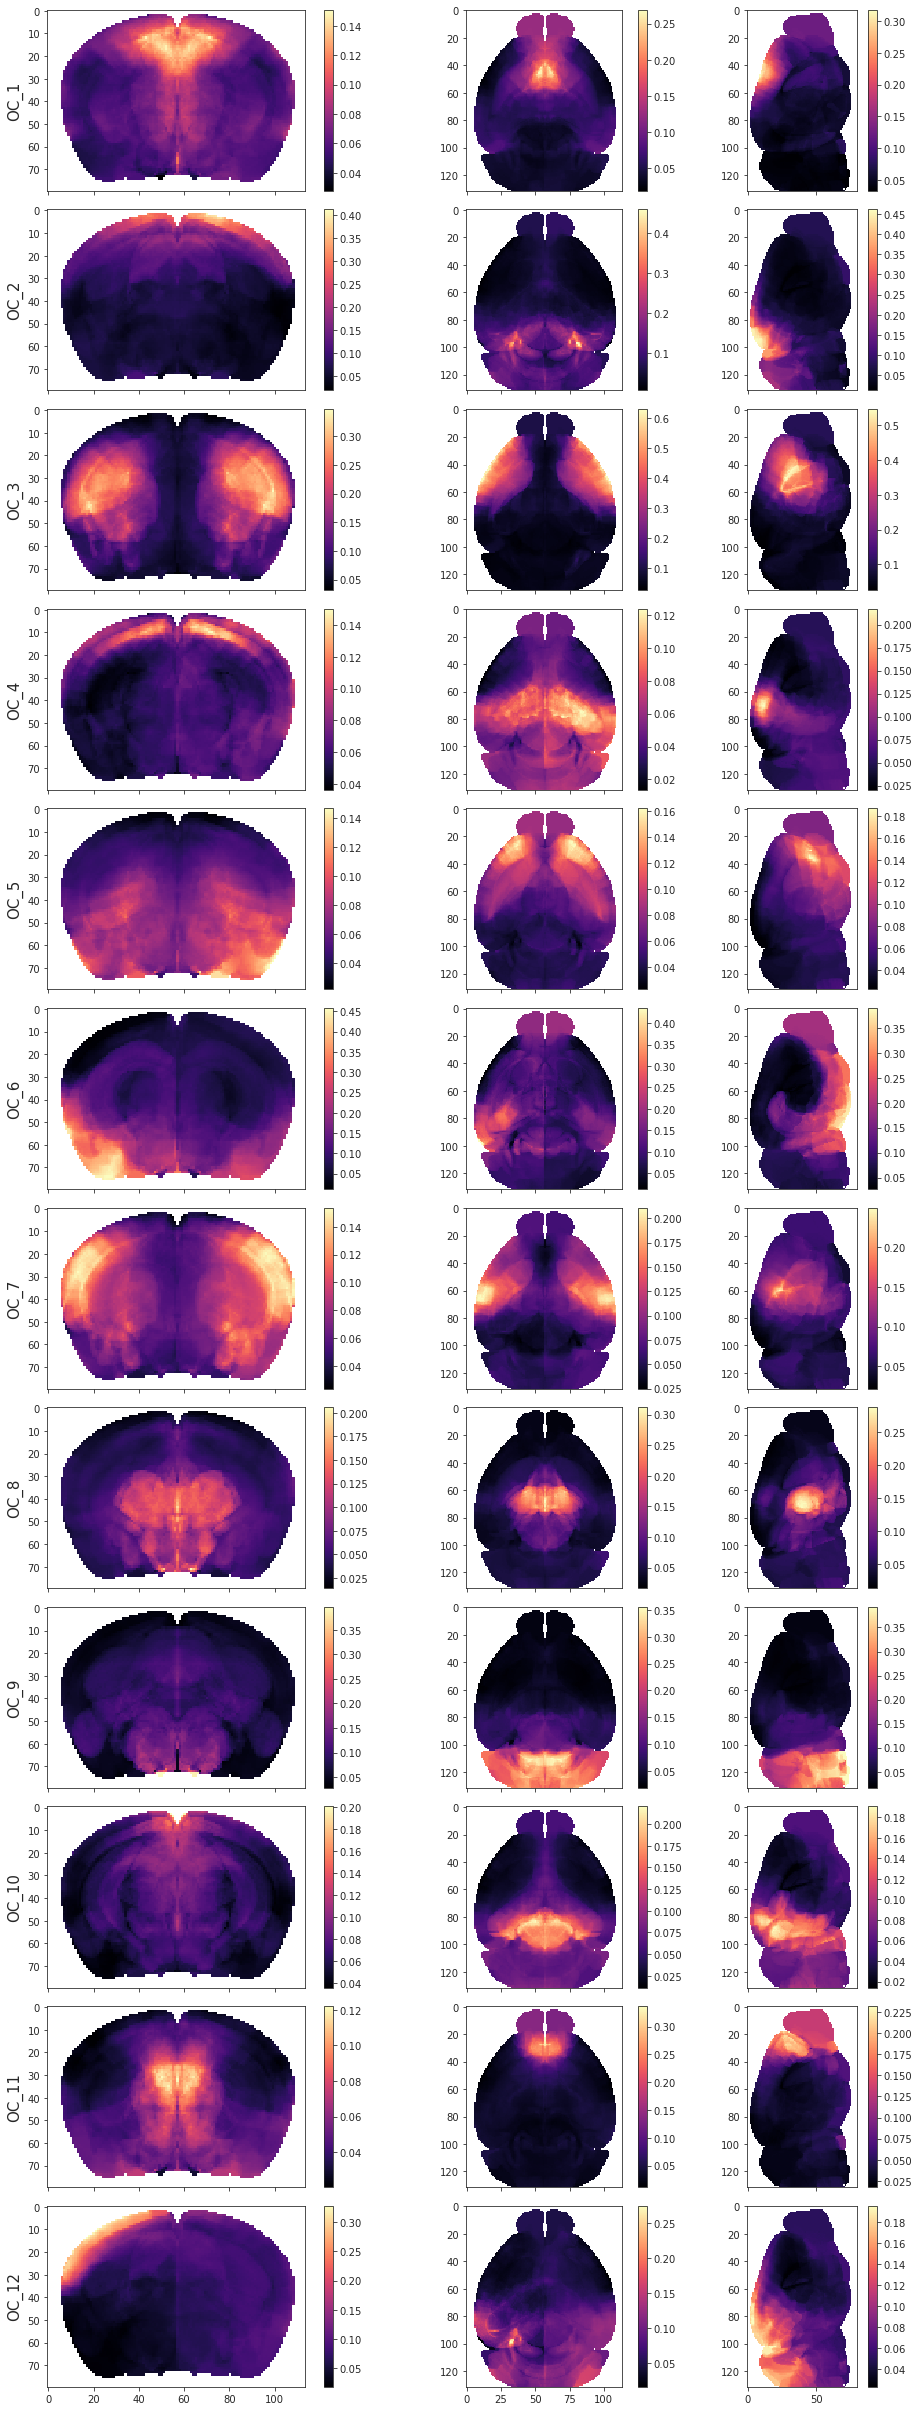

In [12]:
fig, axes = create_figure(gr_bo.num_k, 3, (13, 2.8 * gr_bo.num_k), 'col', 'col', width_ratios=[1.7, 1.4, 1])

for i in range(gr_bo.num_k):
    for j, ax in enumerate(axes[i]):
        im = ax.imshow(bn.nanmean(pi_vol[i], j), cmap='magma')
        plt.colorbar(im, ax=ax)
        if j == 0:
            ax.set_ylabel(f"OC_{i + 1}", fontsize=15)
plt.show()

In [13]:
gr_bo.pi_symmetry_score()

(
    {
        1: 0.99,
        2: 0.978,
        3: 0.986,
        4: 0.963,
        5: 0.975,
        6: 0.885,
        7: 0.952,
        8: 0.994,
        9: 0.986,
        10: 0.983,
        11: 0.994,
        12: 0.659,
        -1: 0.946
    },
    {
        1: 0.991,
        2: 0.937,
        3: 0.972,
        4: 0.976,
        5: 0.991,
        6: 0.97,
        7: 0.965,
        8: 0.996,
        9: 0.994,
        10: 0.987,
        11: 0.994,
        12: 0.918,
        -1: 0.974
    }
)

### K = 14

In [14]:
props_bo['num_k'] = 14
gr_bo = Group(**props_bo).fit_group()

#### pi

In [15]:
gr_bo.avg()
gr_bo.pi.shape

(14, 1072)

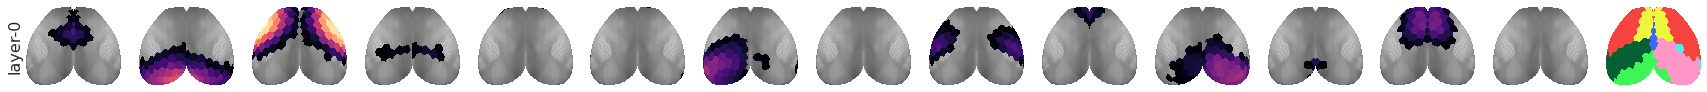

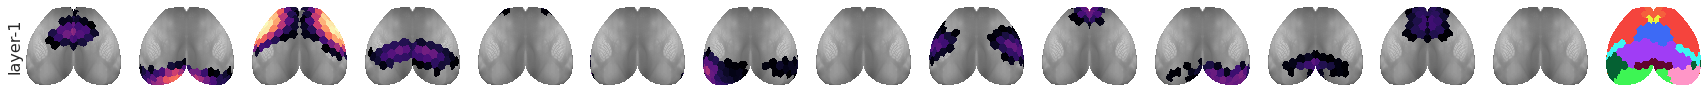

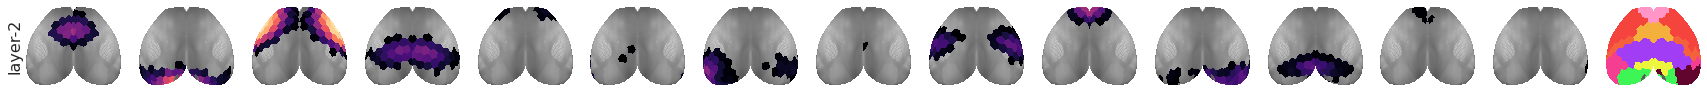

In [16]:
for i in range(3):
    _ = gr_bo.show(
        data={f'layer-{i}': gr_bo.pi},
        layer=i,
        vmin=0.1,
        vmax=np.nanmax(gr_bo.pi),
        figsize=(30, 5),
        ylabel_fontsize=16,
    )

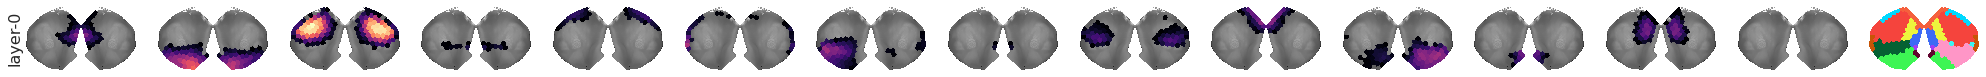

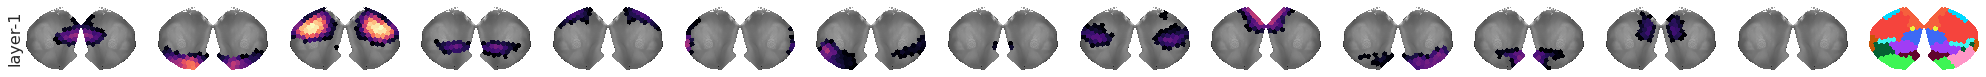

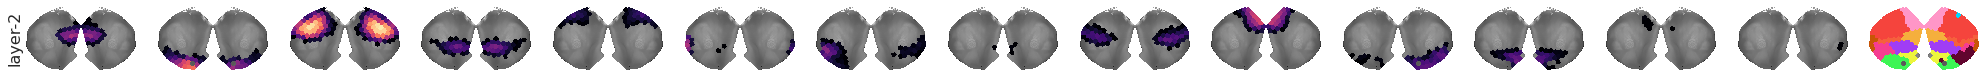

In [17]:
for i in range(3):
    _ = gr_bo.show(
        data={f'layer-{i}': gr_bo.pi},
        layer=i,
        vmin=0.1,
        vmax=np.nanmax(gr_bo.pi),
        proj='flat',
        figsize=(35, 4),
        ylabel_fontsize=16,
    )

In [18]:
x = gr_bo.get_surface_pi()
x.shape

(14, 1072)

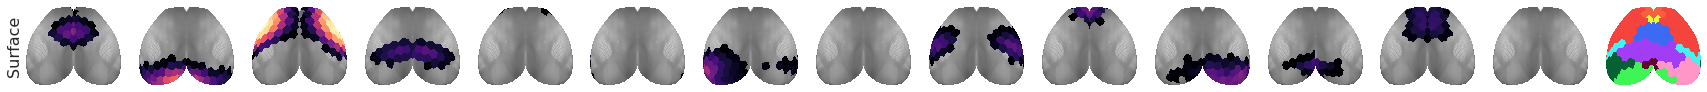

In [19]:
_ = gr_bo.show(
    data={'Surface': x},
    layer=0,
    vmin=0.1,
    vmax=np.nanmax(x),
    figsize=(30, 5),
    ylabel_fontsize=16,
)

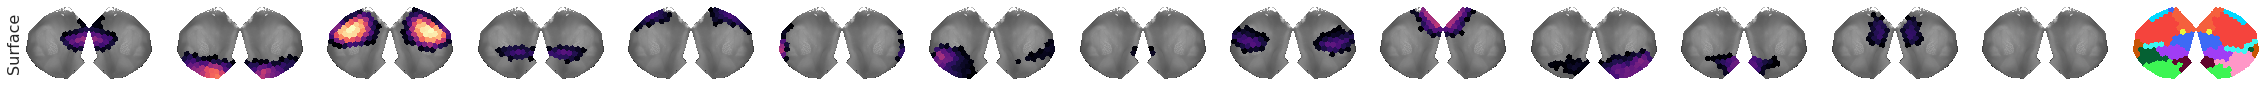

In [20]:
_ = gr_bo.show(
    data={'Surface': x},
    layer=0,
    vmin=0.1,
    vmax=np.nanmax(x),
    proj='flat',
    figsize=(40, 5),
    ylabel_fontsize=16,
)

In [21]:
pi_vol = np_nans((gr_bo.num_k,) + mice.al.dims)
for nn, lbl in gr_bo.n2l.items():
    i = mice.parcel.encode(lbl)
    hcl = [int(e) for e in lbl.split('-')]
    if len(hcl) == 3:
        pi_vol[:, mice.parcel['cortex'] == i] = gr_bo.pi[:, [nn]]
    else:
        obj_name = f"subcortex-{'l' if hcl[0] == 1 else 'r'}"
        pi_vol[:, mice.parcel[obj_name] == i] = gr_bo.pi[:, [nn]]
pi_vol.shape

(14, 132, 80, 114)

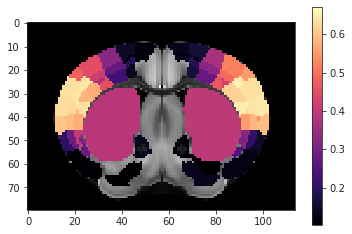

In [22]:
oc = 2
slice_i = 50
plt.imshow(mice.al.template[slice_i], cmap='Greys_r')
plt.imshow(mwh(pi_vol[oc, slice_i] < 0.1, pi_vol[oc, slice_i]), cmap='magma')
plt.colorbar()
plt.show()

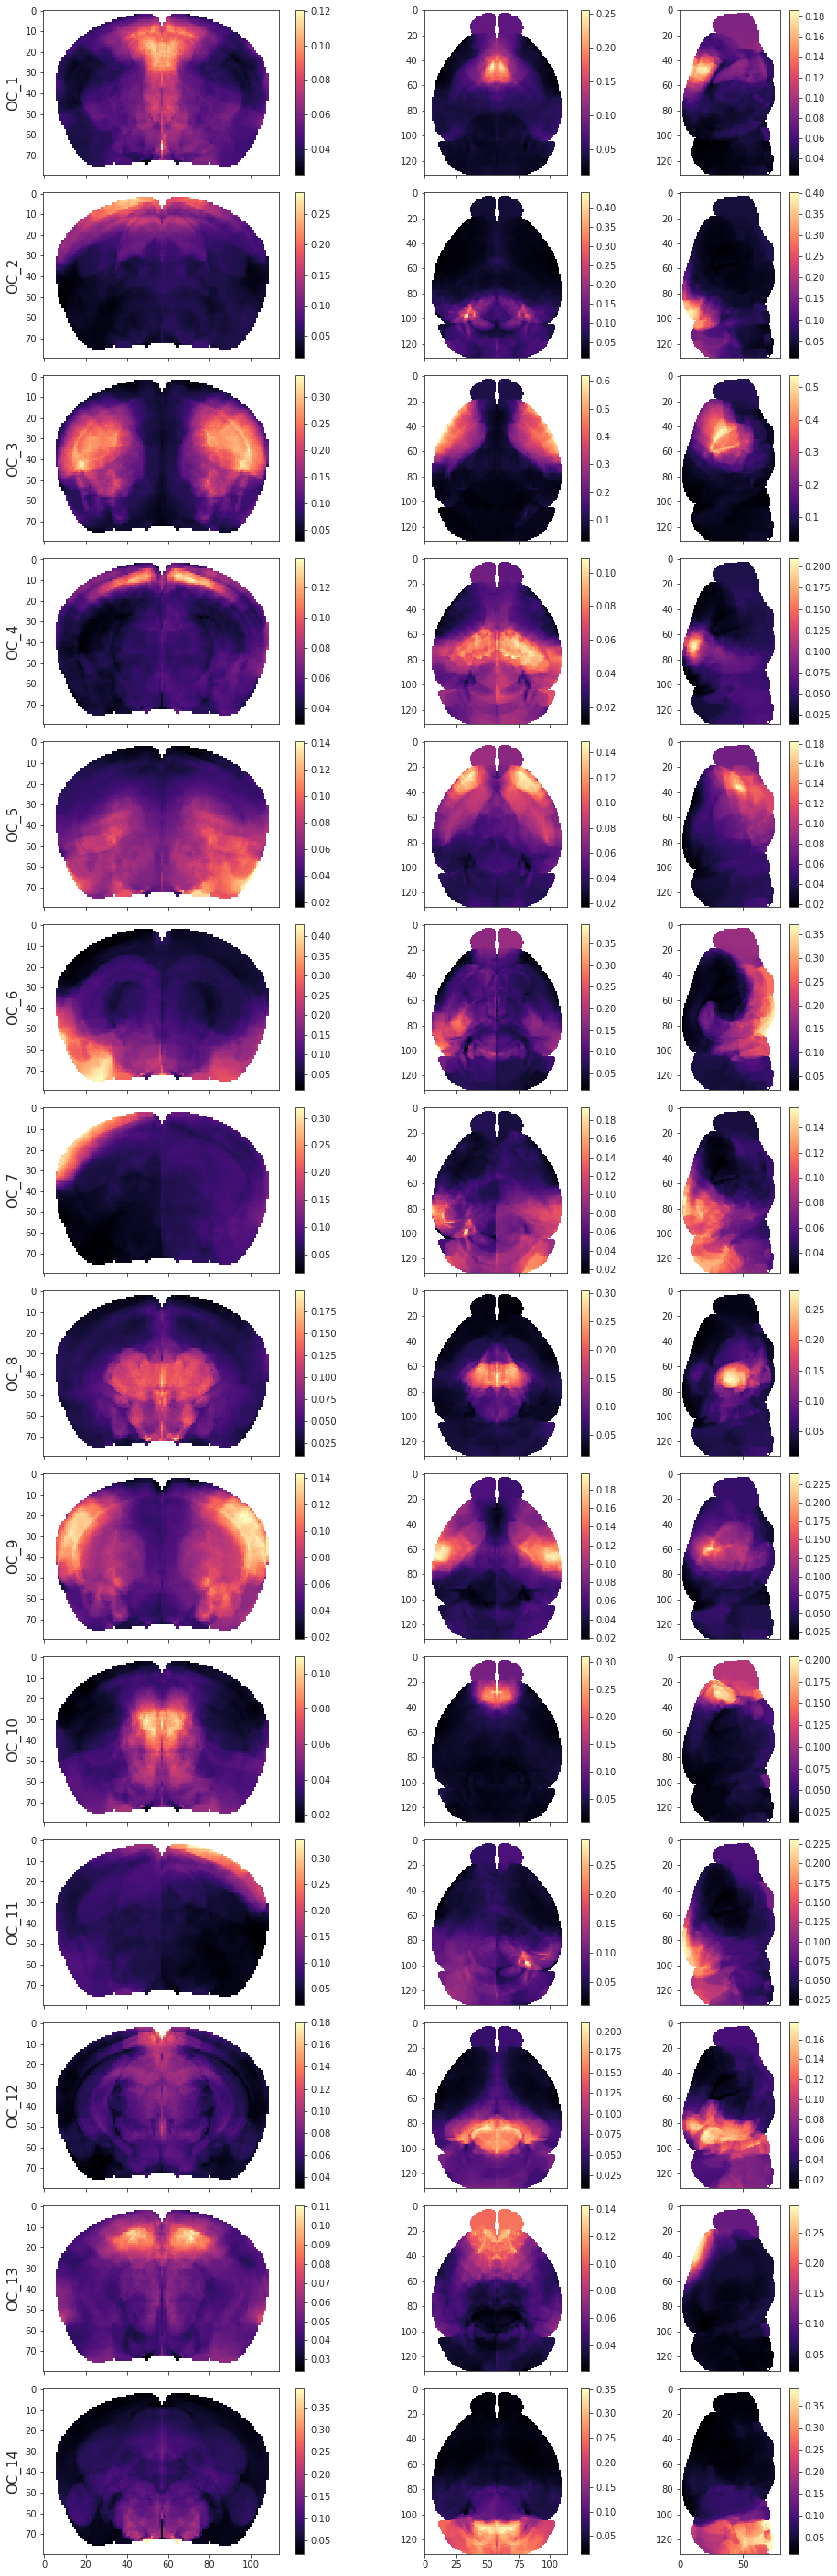

In [23]:
fig, axes = create_figure(gr_bo.num_k, 3, (13, 2.8 * gr_bo.num_k), 'col', 'col', width_ratios=[1.7, 1.4, 1])

for i in range(gr_bo.num_k):
    for j, ax in enumerate(axes[i]):
        im = ax.imshow(bn.nanmean(pi_vol[i], j), cmap='magma')
        plt.colorbar(im, ax=ax)
        if j == 0:
            ax.set_ylabel(f"OC_{i + 1}", fontsize=15)
plt.show()

In [24]:
gr_bo.pi_symmetry_score()

(
    {
        1: 0.99,
        2: 0.973,
        3: 0.985,
        4: 0.971,
        5: 0.975,
        6: 0.925,
        7: 0.489,
        8: 0.994,
        9: 0.953,
        10: 0.994,
        11: 0.653,
        12: 0.984,
        13: 0.987,
        14: 0.989,
        -1: 0.919
    },
    {
        1: 0.994,
        2: 0.933,
        3: 0.974,
        4: 0.983,
        5: 0.989,
        6: 0.972,
        7: 0.92,
        8: 0.996,
        9: 0.968,
        10: 0.998,
        11: 0.884,
        12: 0.987,
        13: 0.998,
        14: 0.993,
        -1: 0.971
    }
)